In [1]:
`%load_ext autoreload
%autoreload 2

In [1]:
from sectionproperties.pre.library import primitive_sections as primitives
from sectionproperties.pre.geometry import Geometry, CompoundGeometry
from sectionproperties.pre.pre import Material
from sectionproperties.analysis.section import Section

In [2]:
mat = Material("Material 1", 59000, 0.3, 60, 35, "palegoldenrod")
exterior = [[-6, 10], [6, 10], [6, -10], [-6, -10]]
interior1 = [[-3, 8], [5, 8], [5, 4], [-3, 4]]
interior2 = [[-4, -6], [4, -6], [4, -2], [-4, -2]]
points = exterior + interior1 + interior2
facets = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 0],
    [4, 5],
    [5, 6],
    [6, 7],
    [7, 4],
    [8, 9],
    [9, 10],
    [10, 11],
    [11, 7],
]
control_points = [[0, 0]]
holes = [[0, 6], [0, -6]]
new_geom = Geometry.from_points(points, facets, control_points, holes, material=mat)
new_geom.create_mesh([0.05])
new_sec = Section(new_geom)

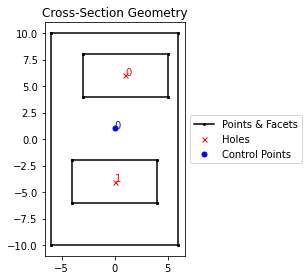

<AxesSubplot:title={'center':'Cross-Section Geometry'}>

In [3]:
new_geom.plot_geometry(labels=['control_points', 'holes'])

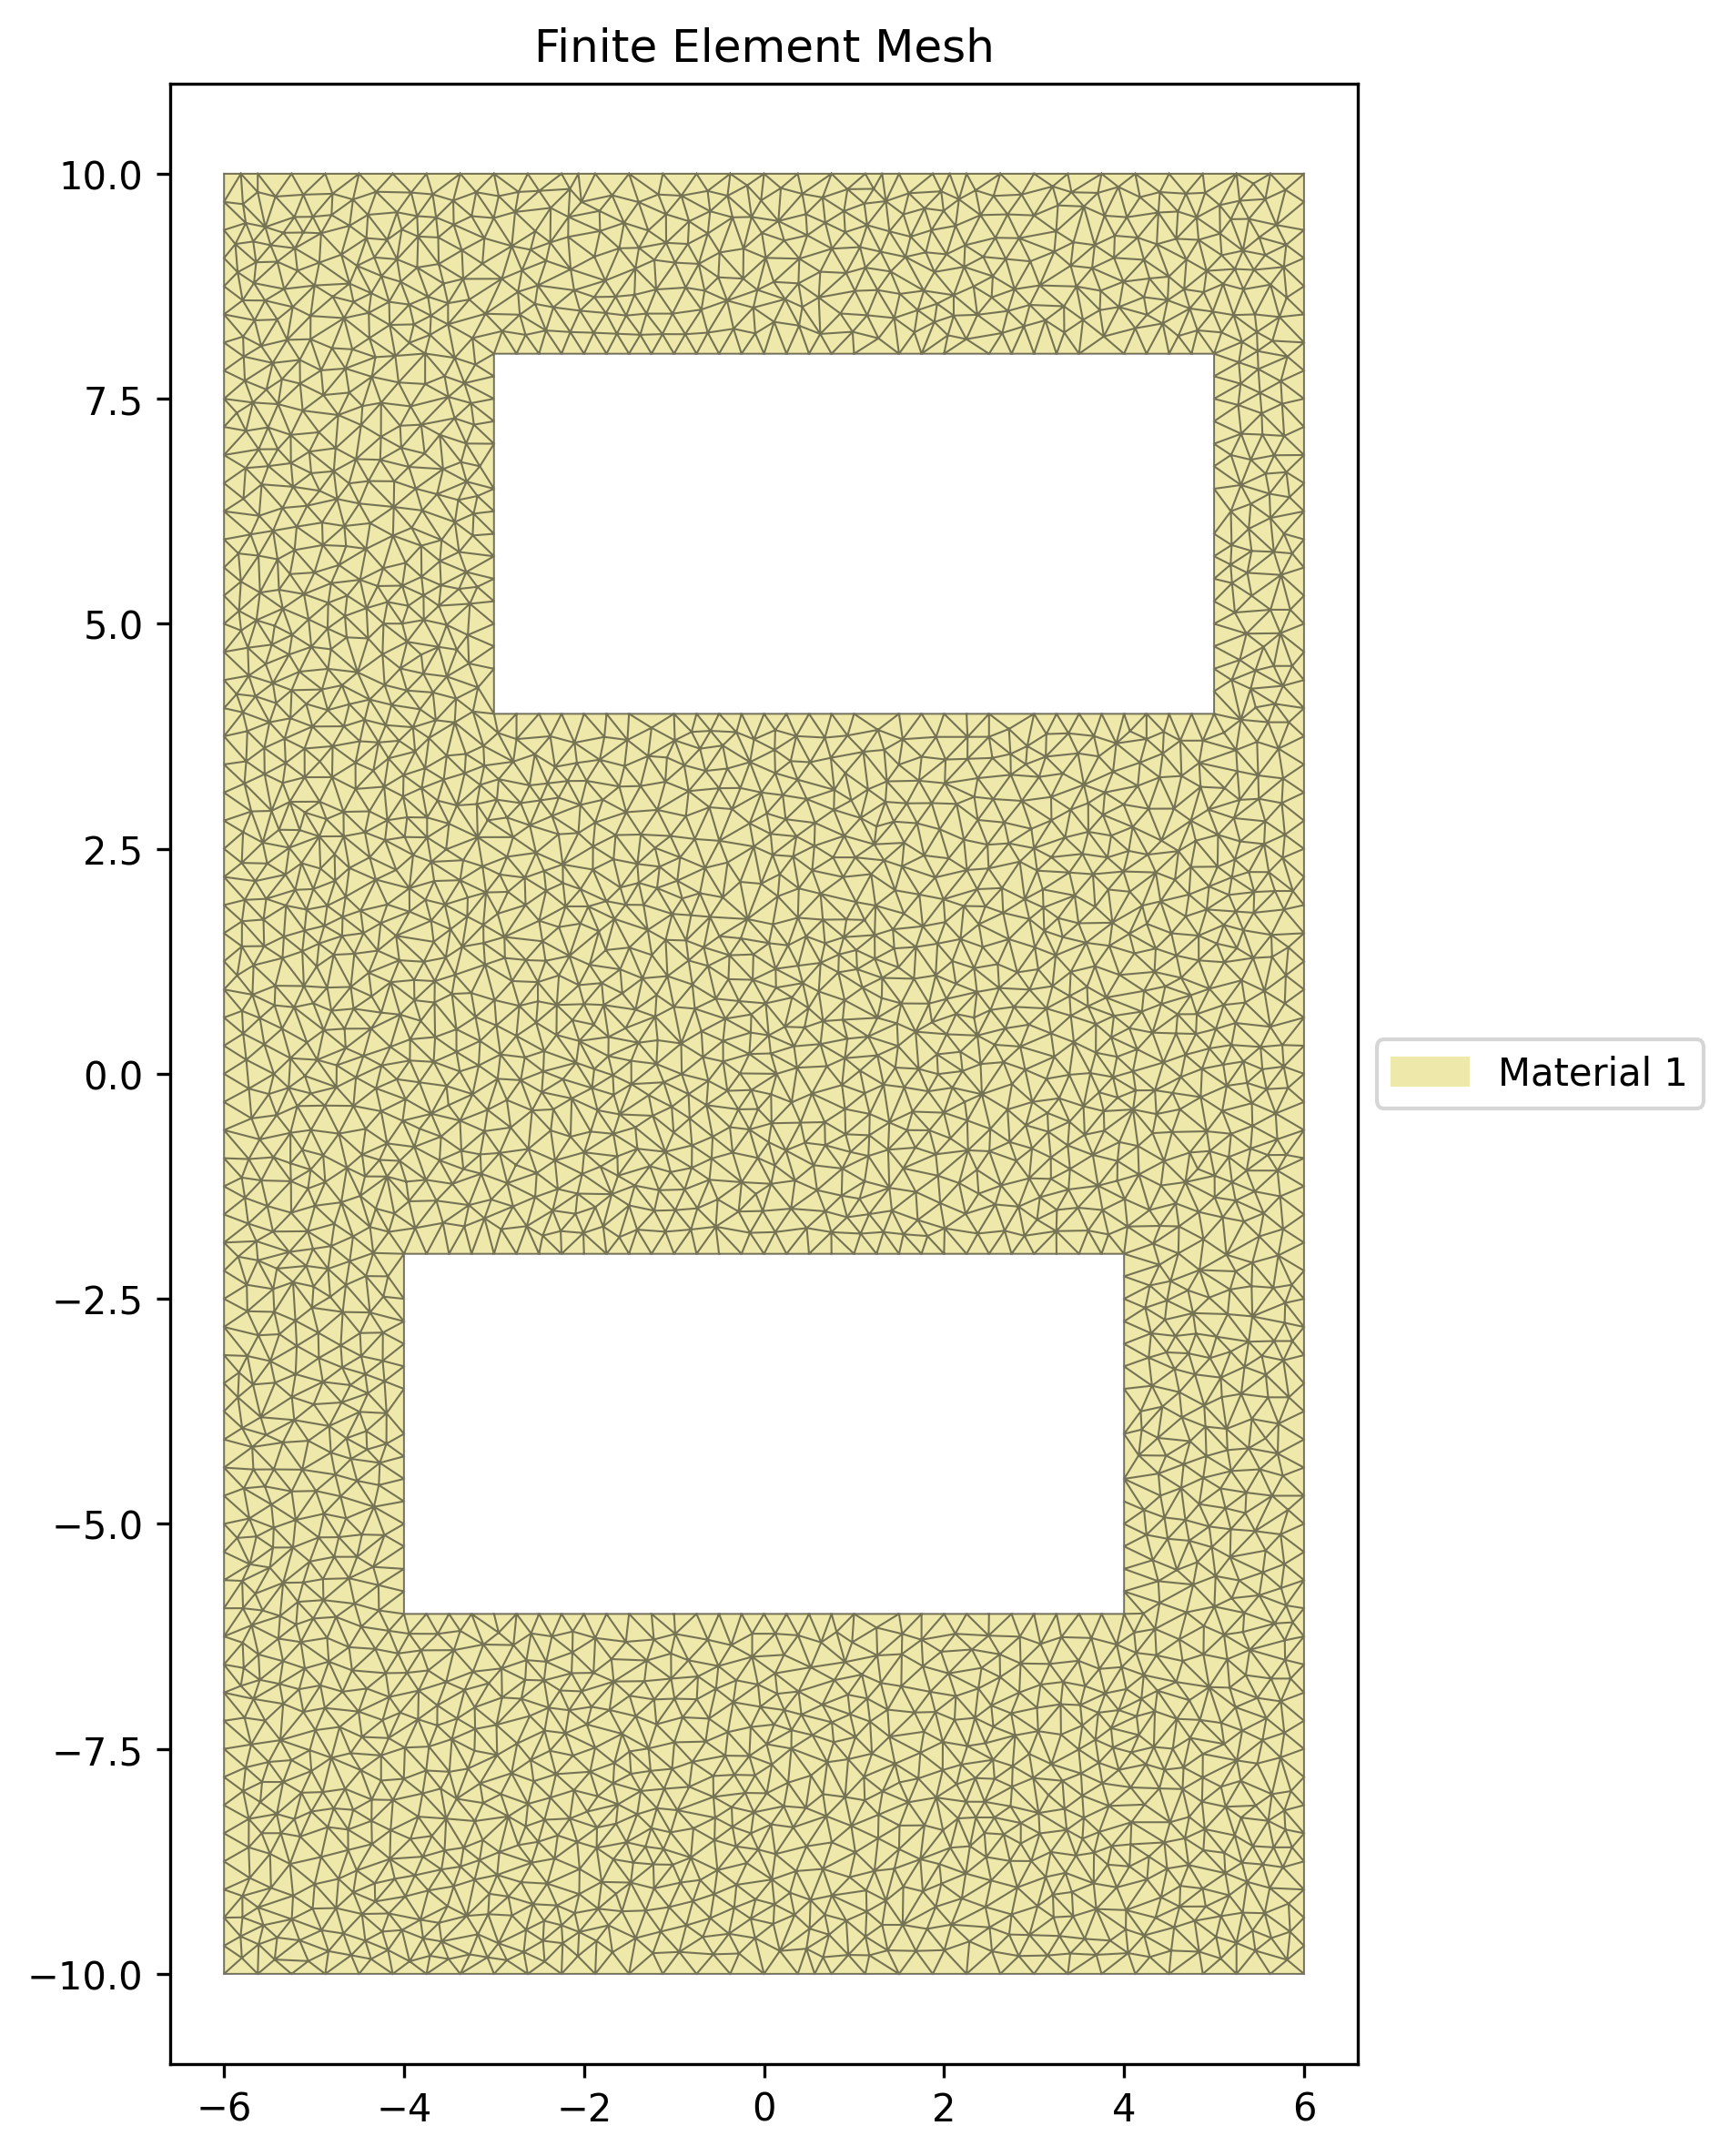

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [12]:
new_sec.plot_mesh(figsize=(8,8), dpi=300)

In [13]:
new_sec.calculate_geometric_properties()
new_sec.calculate_warping_properties()
new_sec.calculate_plastic_properties()

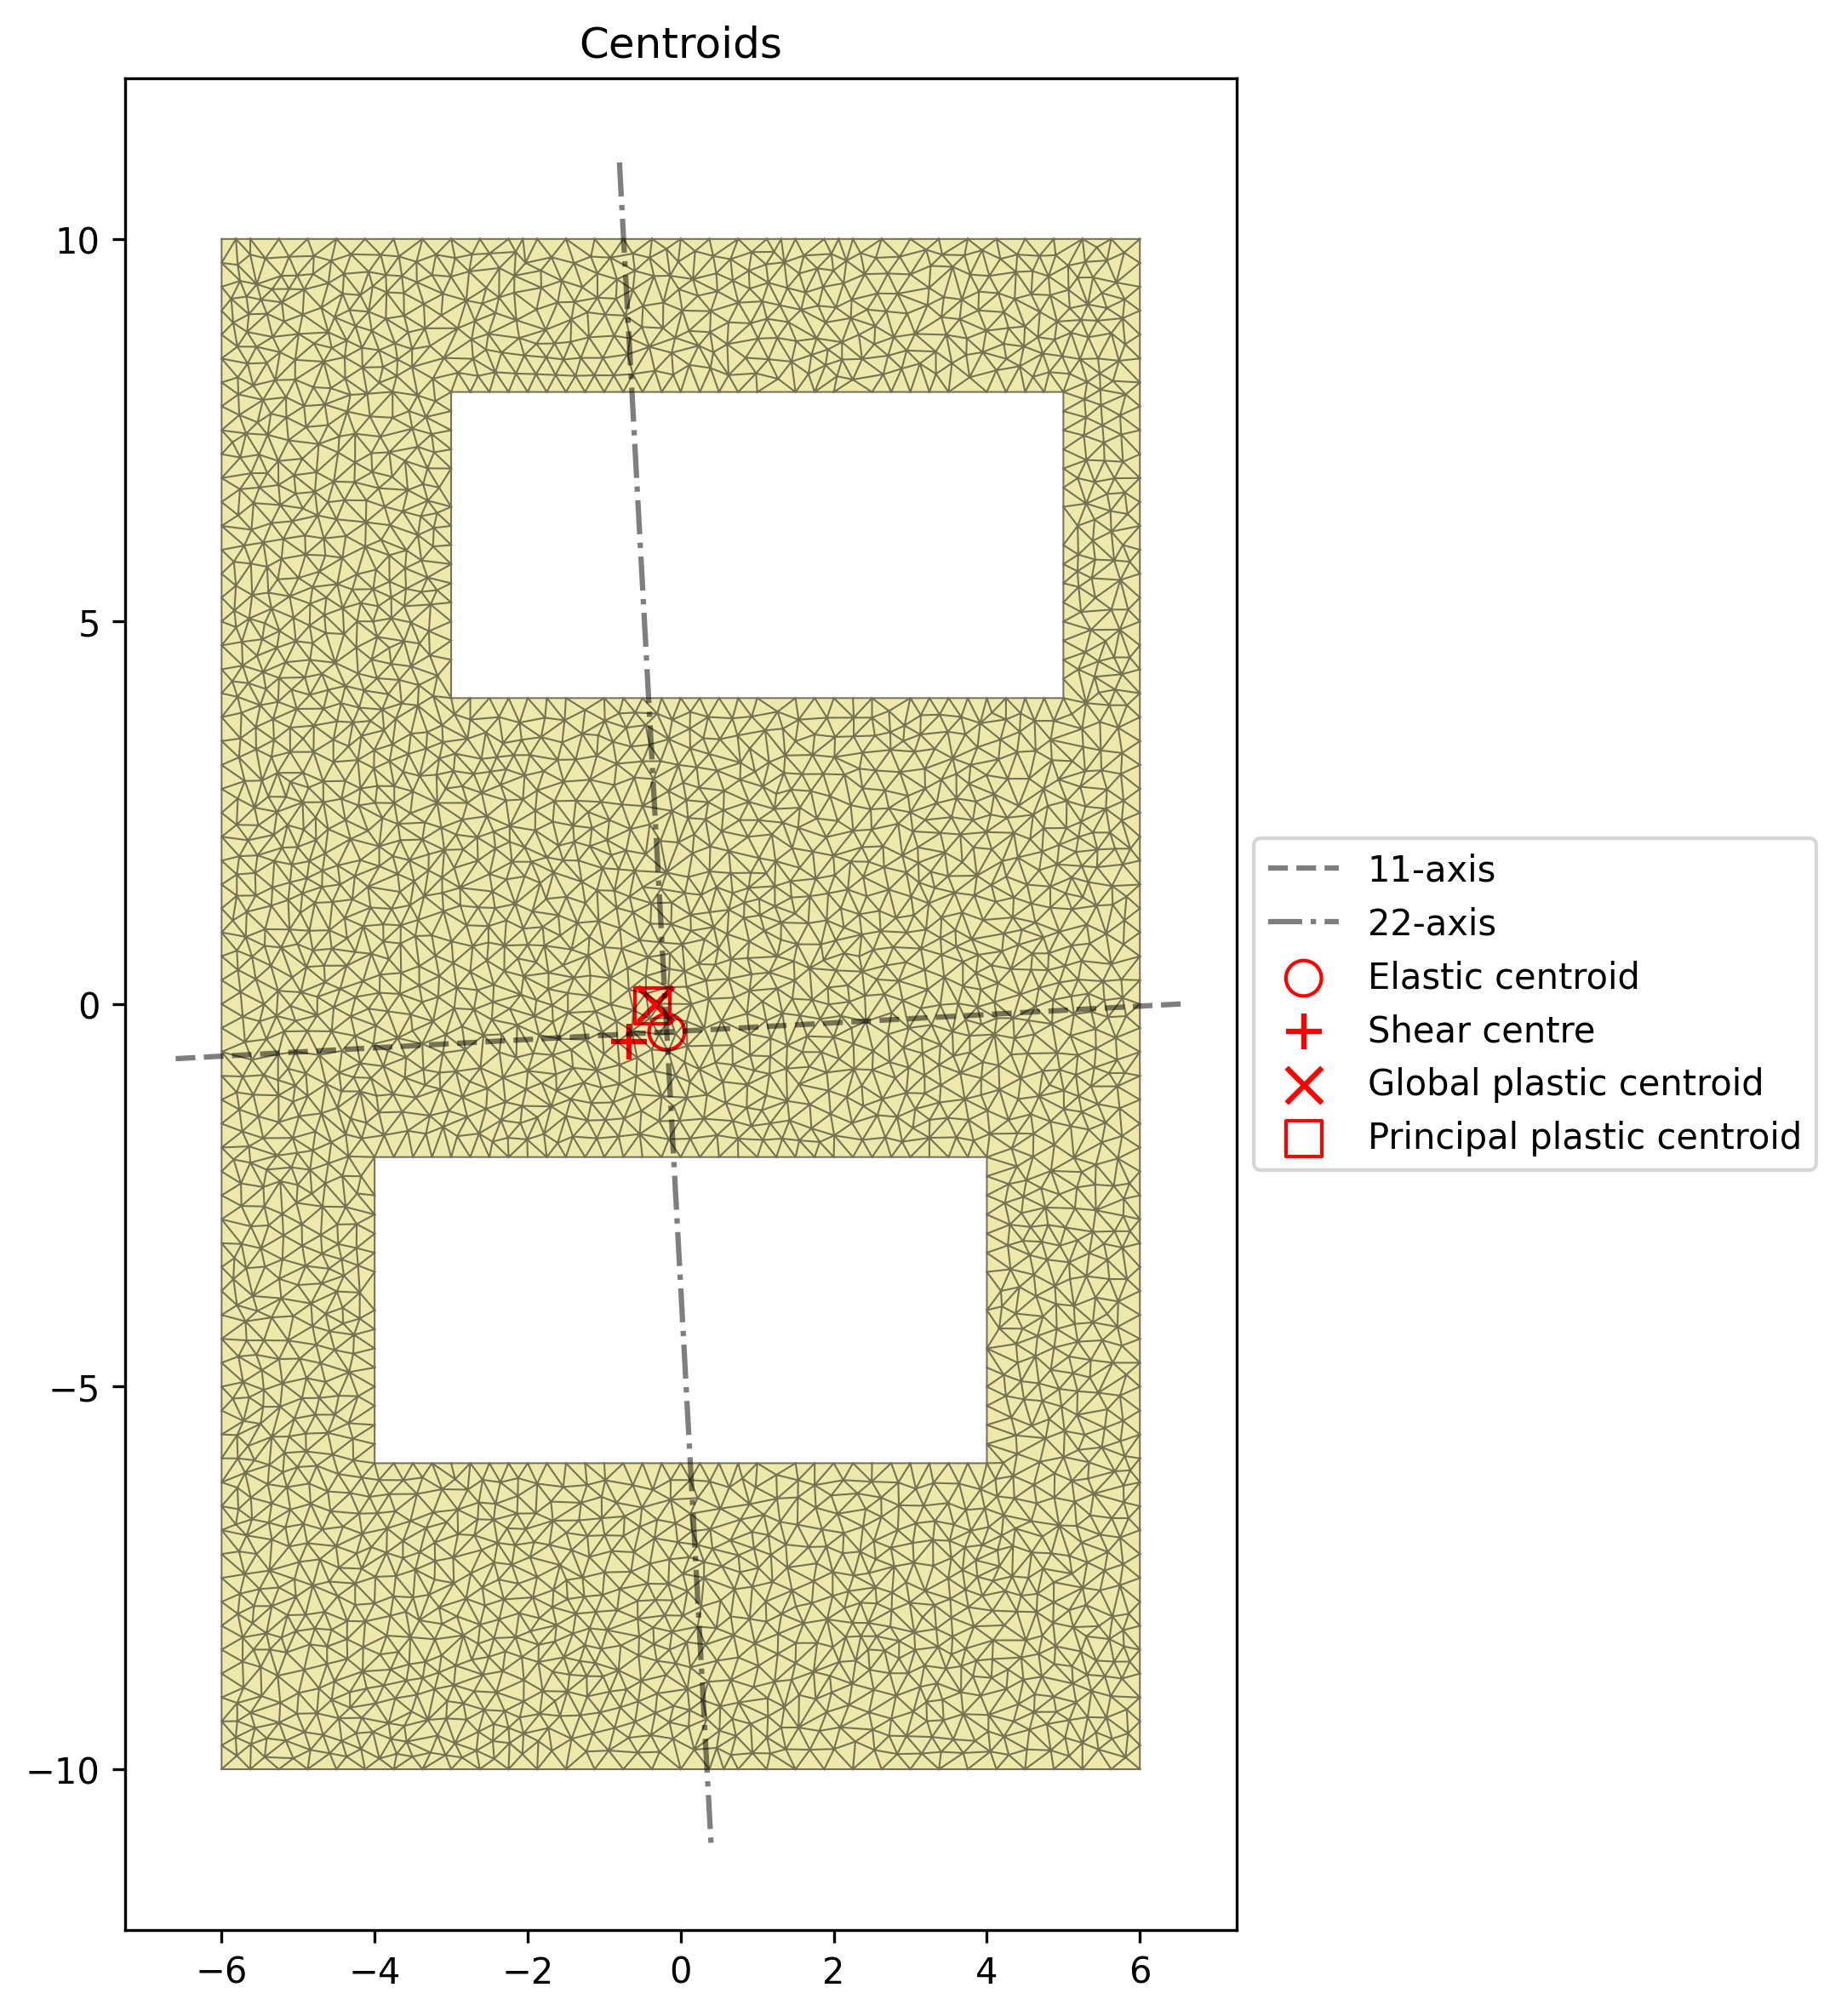

<AxesSubplot:title={'center':'Centroids'}>

In [15]:
new_sec.plot_centroids(figsize=(8, 8), dpi=300)

In [49]:
assymetrical_chan = nastran_chan(75, 200, 8, 16).shift_points(1, dy=-10)

In [53]:
assymetrical_chan.geom.wkt

'POLYGON ((0 0, 75 -10, 75 16, 8 16, 8 184, 75 184, 75 200, 0 200, 0 0))'

In [58]:
assymetrical_chan.mirror_section(axis="x", mirror_point=[50, 50]).geom.wkt

'POLYGON ((0 100, 75 110, 75 84, 8 84, 8 -84, 75 -84, 75 -100, 0 -100, 0 100))'